#### 1.背景与目标
##### 背景
>面对激烈的市场竞争，某航空公司面临客户流失、竞争力下降、资源未得到充分利用等经营危机。公司需要分析不同客户群体的客户价值，并指定相应的营销策略，目前航空公司已经积累了大量客户的数据。

##### 目标
>对客户进行分类；比较不同类别客户的客户价值。

#### 2.分析方法和过程
>分析客户价值的模型主要通过3个指标：最近消费时间间隔（Recency）、消费频率（Frequency）和消费金额（Monetary），简称RFM模型。
>考虑到本案例的实际情况，将客户关系长度L、消费时间间隔R、消费频率F、飞行里程M和折扣系数的平均值C五个指标作为分析客户价值的指标。

#### 2.1数据抽取
>以2014-03-31为结束时间，选取宽度为两年的时间段为分析观测窗口，抽取乘机记录的所有客户详细数据。

#### 2.2数据探索分析
>缺失值分析、异常值分析...

In [1]:
import pandas as pd
datafile = r'D:\Books\Python\Python数据分析与挖掘实战\chapter7\chapter7\demo\data\air_data.csv'
data = pd.read_csv(datafile,encoding='utf-8')
data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/06/07,2011/07/01,男,5,DRANCY,NaN,FR,50.0,2014/03/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


In [3]:
explore = data.describe(percentiles=[],include='all').T #转置数据，计算每个属性的空值、最大值、最小值
explore['null'] = len(data)-explore['count']
explore = explore[['null','max','min']]
explore

,null,max,min
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3245,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


#### 2.3数据预处理
##### 2.3.1数据清洗
>通过数据探索，发现原始数据中存在缺失值，（票价最小值为0，折扣率最小值为0、总飞行里程大于0的记录）通过观察，这类数据占比较小，所以做删除处理。

In [8]:
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()] #b保留非空值
index1 = data['SUM_YR_1']!=0
index2 = data['SUM_YR_2']!=0
index3 = (data['SEG_KM_SUM']==0) & (data['avg_discount']==0)
data = data[index1|index2|index3]
data #只保留票价不等于0的，或者总飞行里程和平均折扣率均为0的数据

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/06/07,2011/07/01,男,5,DRANCY,NaN,FR,50.0,2014/03/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


##### 2.3.2属性规约
>选择与LRFMC模型相关的属性：FFP_DATE、LOAD_TIME、FLIGHT_COUNT、avg_discount、SEG_KM_SUM、LAST_TO_END

In [14]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [16]:
data = data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010


##### 2.3.3数据变换
>L=LOAD_TIME-FFP_DATE、F=FLIGHT_COUNT、C=avg_discount、M=SEG_KM_SUM、R=LAST_TO_END

In [28]:
data2 = data
data2['L'] = (pd.to_datetime(data['LOAD_TIME'])-pd.to_datetime(data['FFP_DATE'])).apply(lambda x:x.days/30)
data2['R'] = data['LAST_TO_END']
data2['F'] = data['FLIGHT_COUNT']
data2['M'] = data['SEG_KM_SUM']
data2['C'] = data['avg_discount']
data2

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,L,R,F,M,C
0,2014/03/31,2006/11/02,1,210,580717,0.961639,90.200000,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314,86.566667,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676,87.166667,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870,68.233333,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658,60.533333,5,152,309928,0.970658
5,2014/03/31,2008/02/10,79,92,294585,0.967692,74.700000,79,92,294585,0.967692
6,2014/03/31,2006/03/22,1,101,287042,0.965347,97.700000,1,101,287042,0.965347
7,2014/03/31,2010/04/09,3,73,287230,0.962070,48.400000,3,73,287230,0.962070
8,2014/03/31,2011/06/07,6,56,321489,0.828478,34.266667,6,56,321489,0.828478
9,2014/03/31,2010/07/05,15,64,375074,0.708010,45.500000,15,64,375074,0.708010


In [29]:
data3 = data2[['L','R','F','M','C']]
data3

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
5,74.700000,79,92,294585,0.967692
6,97.700000,1,101,287042,0.965347
7,48.400000,3,73,287230,0.962070
8,34.266667,6,56,321489,0.828478
9,45.500000,15,64,375074,0.708010


##### 2.3.4 数据标准化
>标准差标准化

In [30]:
#利用标准差标准化方法将数据标准化，并重新命名表头
data4 = (data3-data3.mean(axis=0))/(data3.std(axis=0))
data4.columns = ['Z'+i for i in data3.columns]
data4

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335
5,0.887281,-0.515257,5.671519,13.169947,1.328291
6,1.701075,-0.944948,6.309337,12.811656,1.315599
7,-0.043274,-0.933930,4.325015,12.820586,1.297873
8,-0.543344,-0.917403,3.120249,14.447881,0.575103
9,-0.145883,-0.867824,3.687198,16.993157,-0.076664


#### 2.4 建模

In [32]:
from sklearn.cluster import KMeans
k=5 #指定类别数量
model = KMeans(n_clusters=k,n_jobs=4) #n_jobs并行数
model.fit(data4)
model.cluster_centers_  #查看聚类中心

array([[ 1.16066672, -0.37722119, -0.08691852, -0.09484404, -0.1559046 ],
       [ 0.48332845, -0.79938326,  2.4832016 ,  2.42472391,  0.30863003],
       [ 0.05184279, -0.00266813, -0.22680311, -0.23125407,  2.19134701],
       [-0.31367829,  1.68625847, -0.57401599, -0.53682019, -0.1733261 ],
       [-0.70020646, -0.41488827, -0.16114258, -0.16095751, -0.25513154]])

In [33]:
model.labels_  #查看类别

array([1, 1, 1, ..., 4, 3, 3])

In [34]:
r1 = pd.Series(model.labels_).value_counts() #统计各类别数量
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2,r1],axis=1) #横向连接
r.columns = list(data4.columns) + ['类别数目']
r

,ZL,ZR,ZF,ZM,ZC,类别数目
0,1.160667,-0.377221,-0.086919,-0.094844,-0.155905,15740
1,0.483328,-0.799383,2.483202,2.424724,0.308630,5336
2,0.051843,-0.002668,-0.226803,-0.231254,2.191347,4184
3,-0.313678,1.686258,-0.574016,-0.536820,-0.173326,12125
4,-0.700206,-0.414888,-0.161143,-0.160958,-0.255132,24659


In [35]:
r3 = pd.concat([data4,pd.Series(model.labels_,index=data4.index)],axis=1)
r3.columns = list(data4.columns)+['聚类类别']
r3

,ZL,ZR,ZF,ZM,ZC,聚类类别
0,1.435707,-0.944948,14.034016,26.761154,1.295540,1
1,1.307152,-0.911894,9.073213,13.126864,2.868176,1
2,1.328381,-0.889859,8.718869,12.653481,2.880950,1
3,0.658476,-0.416098,0.781585,12.540622,1.994714,1
4,0.386032,-0.922912,9.923636,13.898736,1.344335,1
5,0.887281,-0.515257,5.671519,13.169947,1.328291,1
6,1.701075,-0.944948,6.309337,12.811656,1.315599,1
7,-0.043274,-0.933930,4.325015,12.820586,1.297873,1
8,-0.543344,-0.917403,3.120249,14.447881,0.575103,1
9,-0.145883,-0.867824,3.687198,16.993157,-0.076664,1


In [36]:
#输出原始数据的具体类别
r4 = pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)
r4.columns = list(data.columns)+['聚类类别']
r4

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,L,R,F,M,C,聚类类别
0,2014/03/31,2006/11/02,1,210,580717,0.961639,90.200000,1,210,580717,0.961639,1
1,2014/03/31,2007/02/19,7,140,293678,1.252314,86.566667,7,140,293678,1.252314,1
2,2014/03/31,2007/02/01,11,135,283712,1.254676,87.166667,11,135,283712,1.254676,1
3,2014/03/31,2008/08/22,97,23,281336,1.090870,68.233333,97,23,281336,1.090870,1
4,2014/03/31,2009/04/10,5,152,309928,0.970658,60.533333,5,152,309928,0.970658,1
5,2014/03/31,2008/02/10,79,92,294585,0.967692,74.700000,79,92,294585,0.967692,1
6,2014/03/31,2006/03/22,1,101,287042,0.965347,97.700000,1,101,287042,0.965347,1
7,2014/03/31,2010/04/09,3,73,287230,0.962070,48.400000,3,73,287230,0.962070,1
8,2014/03/31,2011/06/07,6,56,321489,0.828478,34.266667,6,56,321489,0.828478,1
9,2014/03/31,2010/07/05,15,64,375074,0.708010,45.500000,15,64,375074,0.708010,1


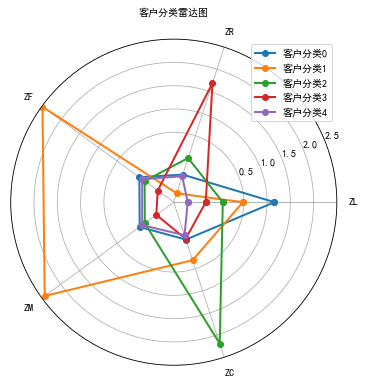

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
labels = np.array(['ZL','ZR','ZF','ZM','ZC'])
N = len(r2)
angles = np.linspace(0,2*np.pi,N,endpoint=False)
p_data = pd.concat([r2,r2.ix[:,0]],axis=1) #使雷达图一圈封闭
angles = np.concatenate((angles,[angles[0]])) #使雷达图一圈封闭
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,polar=True) #设置为极坐标格式
for i in range(0,5):
    ax.plot(angles,p_data.loc[i,:],'o-',linewidth=2,label='客户分类{}'.format(i))
ax.set_thetagrids(angles*180/np.pi,labels) #添加标签
ax.set_title('客户分类雷达图',va='bottom',fontproperties='SimHei')
ax.set_rlim(-1,2.5) #设置雷达图范围
ax.grid(True) #添加网格线
plt.legend()
plt.show()

`客户关系长度L、消费时间间隔R、消费频率F、飞行里程M和折扣系数的平均值C`

##### 雷达图解读
>客户分类0：关系长度较大，但其它指标较小，有流失趋势，可列为重要挽留客户，保持与客户互动，了解其最新信息；

>客户分类1：消费频率和飞行里程都较大，为重要高价值客户，要实施差异化管理，尽量将资源优先放在此类客户上，提高客户忠诚度和满意度。

>客户分类2：折扣系数较大，消费潜力大，可列为重点发展客户，努力刺激其成为高价值用户。

>客户分类3：消费时间间隔较大，只在淡季折扣力度很大时才消费，属于低价值客户，在资源紧张时可放弃此类客户。

>客户分类4：五项指标均较低，属于一般客户，在资源紧张时可放弃此类客户。